# Importing Packages

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preperation

## Loading the Data

In [5]:
# Load a sample machinery dataset related to fault prediction (Supervised Learning)
from sklearn.datasets import fetch_openml

## Preparing the data frame

In [51]:
# Fetch the dataset: Fault Diagnosis of Machinery
# This dataset contains sensor readings used to detect faults in machinery.
data = fetch_openml(data_id=40945, as_frame=True)
df = data.frame

In [13]:
## Overviewing the Data

In [52]:
print("Data Shape: ", df.shape)
print(df.head())

Data Shape:  (1309, 14)
   pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
1       1        1                   Allison, Master. Hudson Trevor    male   
2       1        0                     Allison, Miss. Helen Loraine  female   
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0      

In [53]:
print("Missing Values: \n", df.isnull().sum())

Missing Values: 
 pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


Separating features and target variable
#X= df.drop(columns=['pclass'])
X= df.drop(columns=['name'])
X= df.drop(columns=['home.dest'])
X= df.drop(columns=['sex'])
y = df['pclass']

In [48]:
# Encoding categorical target variable if needed
y = y.astype('category').cat.codes

# Data Processing

In [55]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# One-Hot Encoding categorical features without dropping any columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df_encoded.drop(columns=['pclass'])  # Features
y = df_encoded['pclass']  # Target

Categorical columns: Index(['name', 'ticket', 'cabin', 'boat', 'home.dest'], dtype='object')


In [57]:
# Data Processing - Scaling features for machine learning
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Splitting the data into training and testing sets (80-20 split)

In [90]:
# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state =45)

In [91]:
model =  RandomForestClassifier(n_estimators = 80, random_state = 45)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=45)

In [92]:
y_pred = model.predict(X_test)

In [95]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ",accuracy)
#print("\n Classification Report: \n",classificiation_report(y_test,y_pred))

Model Accuracy:  0.950381679389313


## Plotting the Data

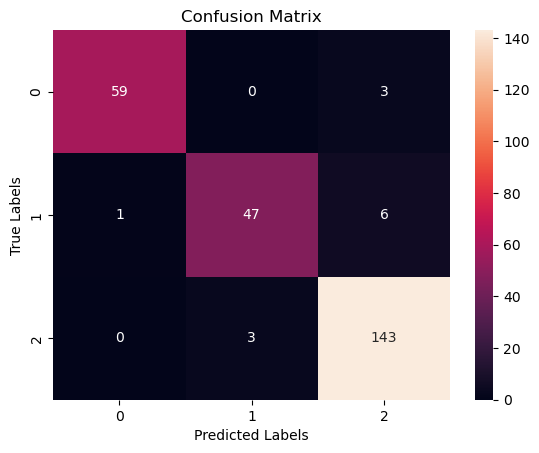

In [94]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot= True, fmt ="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()